# Loading Libraries

In [ ]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Mounting GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class_names = [
    'air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
    'drilling', 'engine_idling', 'gun_shot', 'jackhammer',
    'siren', 'street_music'
]

# Further Feature Extraction based on metrics

In [ ]:
data = np.load('/content/drive/MyDrive/urbansound8k_spectrograms_balanced_default_1.npz')
X = data['spectrograms']
y = data['labels']

def feature_extract(spectrograms):
    features = []
    for spec in spectrograms:
        feat = [
            np.mean(spec),
            np.std(spec),
            np.max(spec),
            np.min(spec),
            np.median(spec),
            np.percentile(spec, 25),
            np.percentile(spec, 75),
            np.mean(spec, axis=0).mean(),
            np.mean(spec, axis=1).mean(),
            np.var(spec),
            np.ptp(spec)
        ]
        features.append(feat)
    return np.array(features)

X_flat = X.reshape(X.shape[0], -1)
stat_features = feature_extract(X)
X_stack = np.hstack([X_flat, stat_features])

X_train, X_int, y_train, y_int = train_test_split(
    X_stack, y, test_size=0.4, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_int, y_int, test_size=0.5, stratify=y_int
)

# Support Vector Machine (SVM) code

[LibSVM]SVM Train Accuracy:  0.8521666666666666
SVM Validation Accuracy:  0.7855
SVM Test Accuracy:  0.769
                  precision    recall  f1-score   support

 air_conditioner       0.61      0.81      0.70       200
        car_horn       0.87      0.95      0.91       200
children_playing       0.62      0.63      0.62       200
        dog_bark       0.86      0.64      0.74       200
        drilling       0.82      0.69      0.75       200
   engine_idling       0.78      0.75      0.77       200
        gun_shot       0.94      0.96      0.95       200
      jackhammer       0.73      0.79      0.76       200
           siren       0.88      0.85      0.86       200
    street_music       0.65      0.61      0.63       200

        accuracy                           0.77      2000
       macro avg       0.78      0.77      0.77      2000
    weighted avg       0.78      0.77      0.77      2000



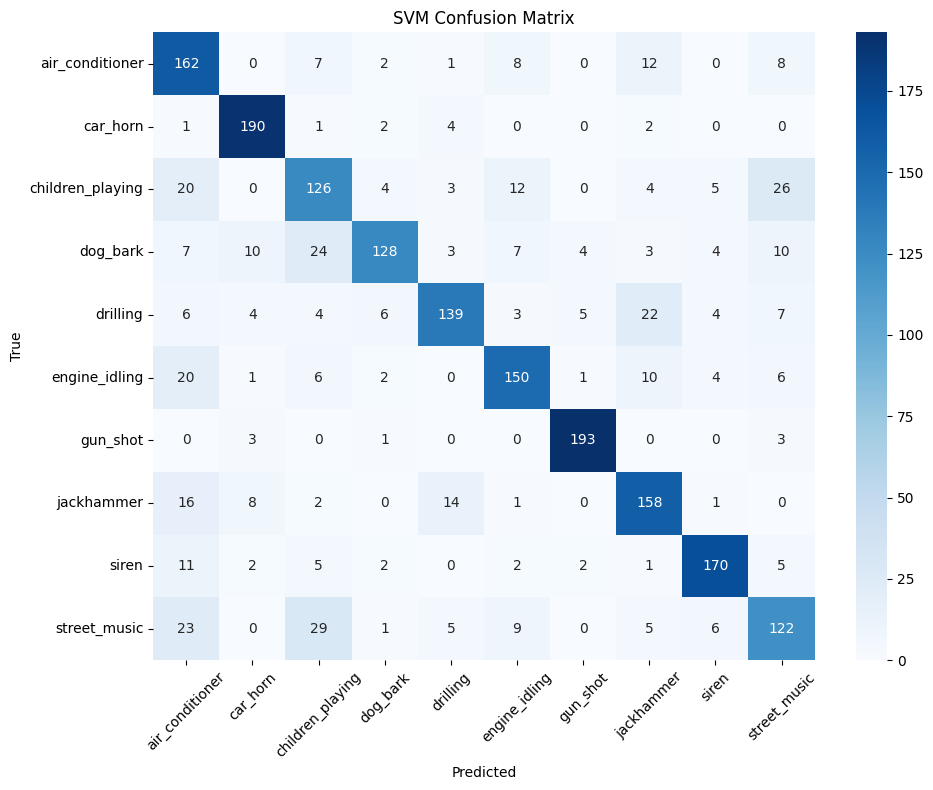

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    verbose=True
)

svm_model.fit(X_train_scaled, y_train)

y_train_pred_svm = svm_model.predict(X_train_scaled)
svm_train_accuracy = accuracy_score(y_train, y_train_pred_svm)
print(f"SVM Train Accuracy: ", svm_train_accuracy)

y_val_pred_svm = svm_model.predict(X_val_scaled)
svm_val_accuracy = accuracy_score(y_val, y_val_pred_svm)
print(f"SVM Validation Accuracy: ", svm_val_accuracy)

y_test_pred_svm = svm_model.predict(X_test_scaled)
svm_test_accuracy = accuracy_score(y_test, y_test_pred_svm)
print(f"SVM Test Accuracy: ", svm_test_accuracy)

print(classification_report(y_test, y_test_pred_svm, target_names=class_names))

cm = confusion_matrix(y_test, y_test_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Random Forest (RF) Code

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   55.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished


Random Forest Train Accuracy:  0.9995
Random Forest Validation Accuracy:  0.762


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished


Random Forest Test Accuracy:  0.77
                  precision    recall  f1-score   support

 air_conditioner       0.69      0.79      0.74       200
        car_horn       0.93      0.93      0.93       200
children_playing       0.52      0.50      0.51       200
        dog_bark       0.77      0.70      0.73       200
        drilling       0.79      0.74      0.76       200
   engine_idling       0.83      0.81      0.82       200
        gun_shot       0.94      0.98      0.96       200
      jackhammer       0.73      0.88      0.80       200
           siren       0.88      0.76      0.82       200
    street_music       0.63      0.61      0.62       200

        accuracy                           0.77      2000
       macro avg       0.77      0.77      0.77      2000
    weighted avg       0.77      0.77      0.77      2000



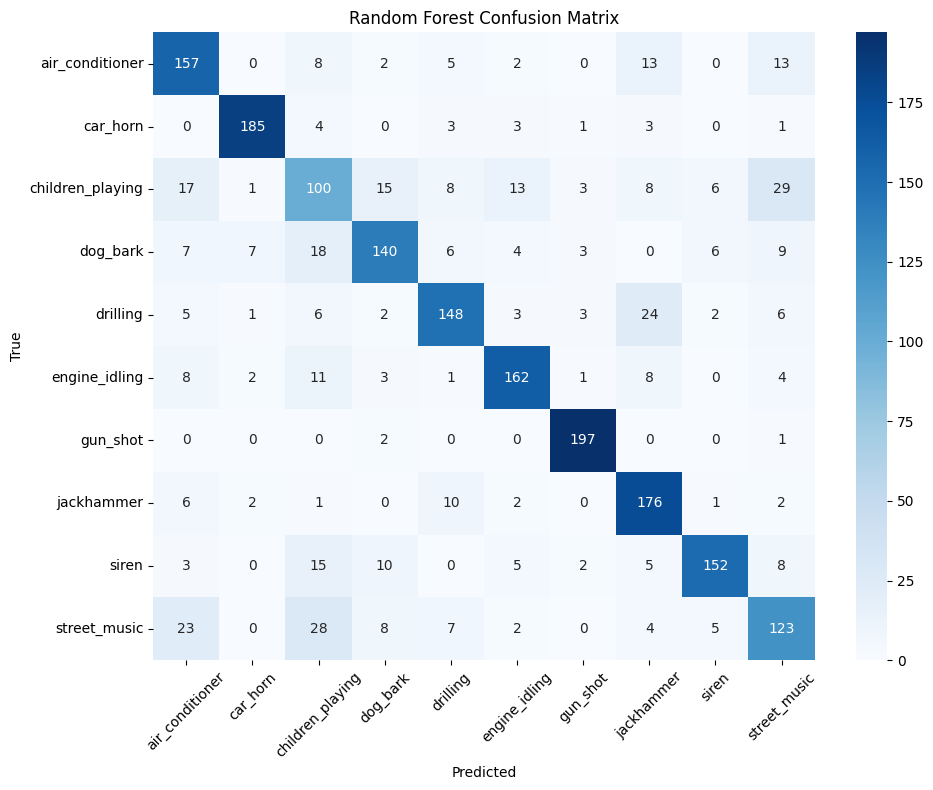

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=99,
    n_jobs=-1,
    verbose=1
)

rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, y_train_pred_rf)
print(f"Random Forest Train Accuracy: ", rf_train_accuracy)

y_val_pred_rf = rf_model.predict(X_val)
rf_val_accuracy = accuracy_score(y_val, y_val_pred_rf)
print(f"Random Forest Validation Accuracy: ", rf_val_accuracy)

y_test_pred_rf = rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest Test Accuracy: ", rf_test_accuracy)

print(classification_report(y_test, y_test_pred_rf, target_names=class_names))

cm = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Saving the model

In [ ]:
import joblib
joblib.dump(svm_model, '/content/drive/MyDrive/svm_model_2.pkl')
joblib.dump(rf_model, '/content/drive/MyDrive/rf_model_2.pkl')

['/content/drive/MyDrive/rf_model_2.pkl']